In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Quick Sort tiempos


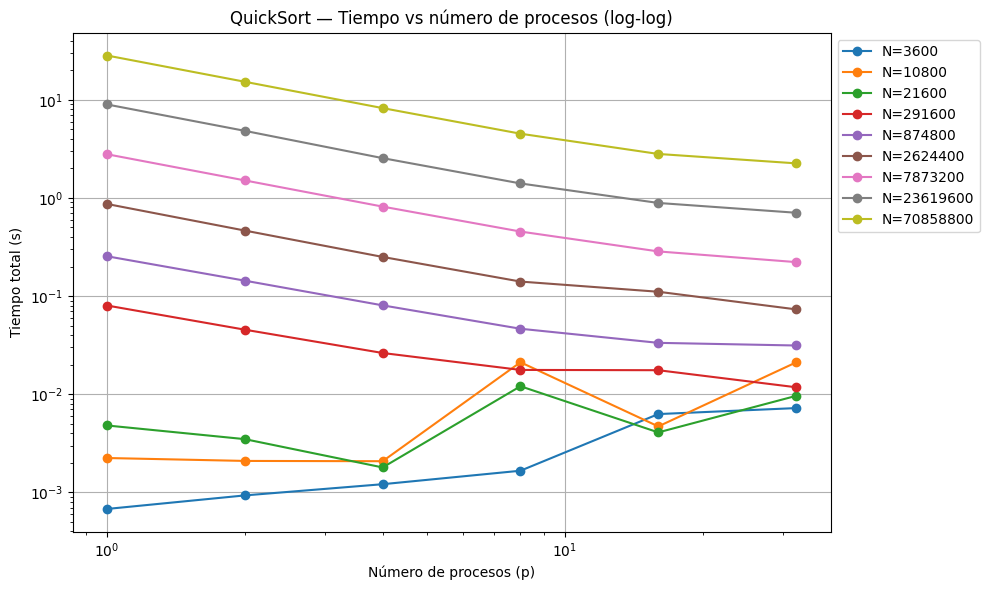

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TIEMPOS_DIR = "./tiempos/quickSort"
procesos = os.listdir(TIEMPOS_DIR)

all_data = []
for p in procesos:
    csv_path = os.path.join(TIEMPOS_DIR, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)

df_all_qs = pd.concat(all_data, ignore_index=True)

df_qs = df_all_qs.copy()
df_qs = df_qs[~df_qs['Step'].isin([1])]  

df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']

df_grouped_qs = (
    df_qs.groupby(['N', 'p'], as_index=False)[['Total']].sum()
)


unique_N = sorted(df_grouped_qs['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}


plt.figure(figsize=(10, 6))

for N, df_N in df_grouped_qs.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'],
             marker='o',
             label=f"N={N}",
             color=colors[N])

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo total (s)")
plt.title("QuickSort — Tiempo vs número de procesos (log-log)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


# Tiempos V1

,Step,Computo,Comunicacion,N,p
0,0,0.000011,1.151200e-04,10800,25
1,1,0.007427,1.314900e-04,10800,25
2,2,0.000188,2.958600e-04,10800,25
3,3,0.000680,0.000000e+00,10800,25
4,4,0.001120,0.000000e+00,10800,25
...,...,...,...,...,...
373,2,0.007433,4.200000e-07,874800,1
374,3,0.250282,0.000000e+00,874800,1
375,4,0.397813,0.000000e+00,874800,1
376,5,0.000000,6.651500e-04,874800,1


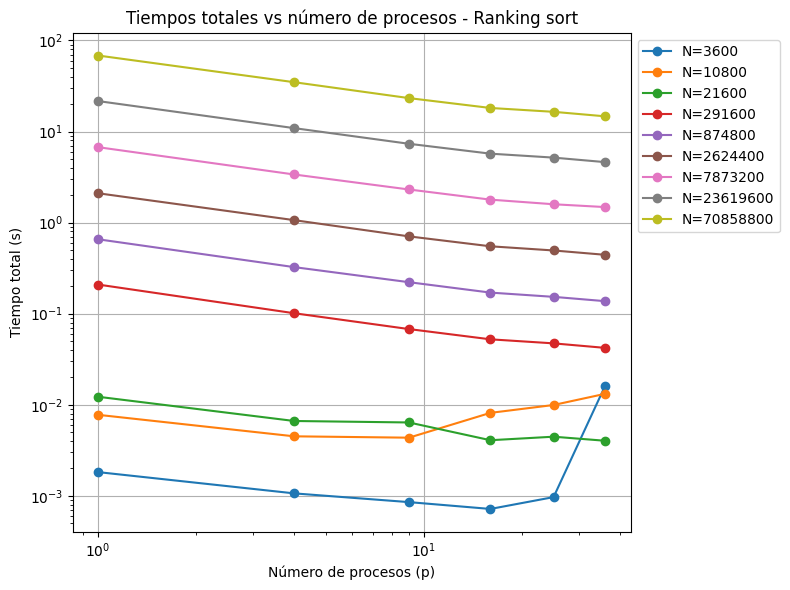

In [3]:
TIEMPOS_DIR = "./tiempos/v1"

procesos = os.listdir(TIEMPOS_DIR)

DATA_DIR = "./data"

N_s = os.listdir(DATA_DIR)

# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
display(df_all)

df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = (
    df_filtered
    .groupby(['N', 'p'], as_index=False)[['Total']].sum()
)

unique_N = sorted(df_grouped['N'].unique())
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

df_filtered = df_all[df_all['Step'] != 6]
df_filtered = df_filtered[df_filtered['Step'] != 0]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']
df_grouped = df_filtered.groupby(['N', 'p'], as_index=False)[['Total']].sum()

plt.figure(figsize=(8, 6))

for N, df_N in df_grouped.groupby('N'):
    plt.plot(df_N['p'], df_N['Total'],
             marker='o',
             label=f'N={N}',
             color=colors[N])

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Número de procesos (p)')
plt.ylabel('Tiempo total (s)')
plt.title('Tiempos totales vs número de procesos - Ranking sort')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()
plt.show()


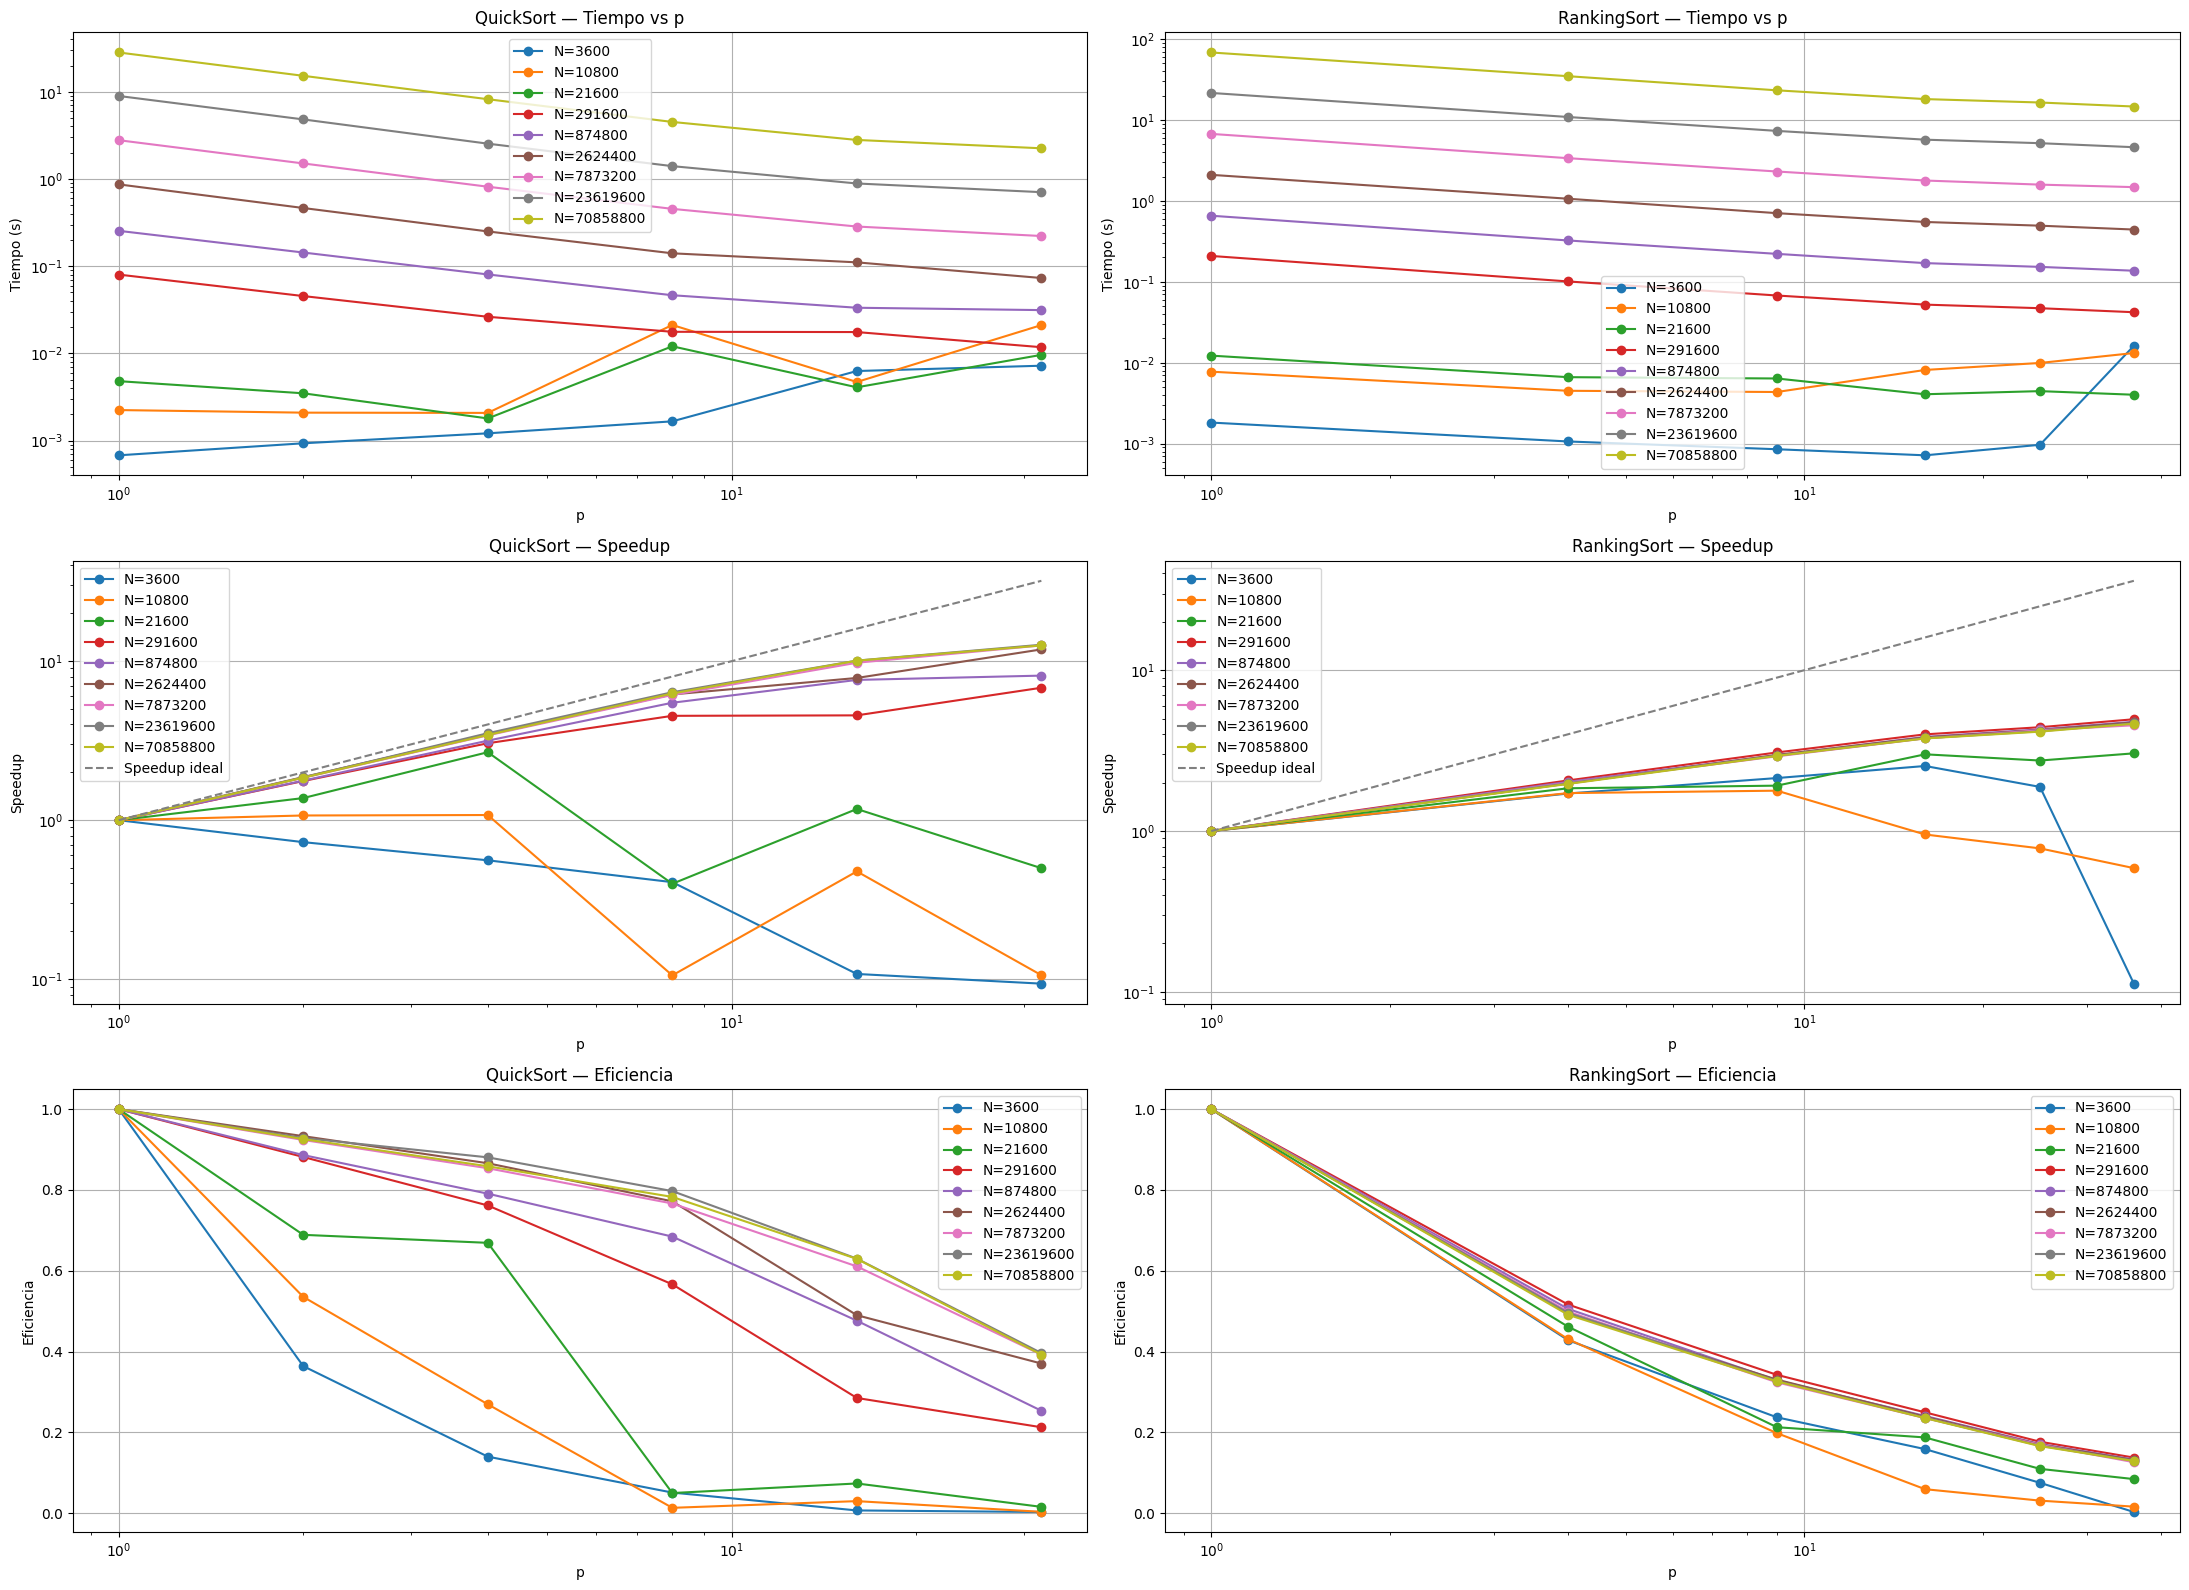

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------
#   QUICK SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']
df_grouped_qs = df_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   RANKING SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_RS = "./tiempos/v1"
procesos_rs = os.listdir(TIEMPOS_DIR_RS)

all_data_rs = []
for p in procesos_rs:
    csv_path = os.path.join(TIEMPOS_DIR_RS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_rs.append(df)

df_all_rs = pd.concat(all_data_rs, ignore_index=True)
df_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_rs['Total'] = df_rs['Computo'] + df_rs['Comunicacion']
df_grouped_rs = df_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   SPEEDUP DATA (QS y RS)
# ---------------------------------------------------

# QuickSort speedup
df_speed_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_speed_qs['Total'] = df_speed_qs['Computo'] + df_speed_qs['Comunicacion']
df_speed_qs = df_speed_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# RankingSort speedup
df_speed_rs = df_all_rs[df_all_rs['Step'].isin([1,2,3,4,5])].copy()
df_speed_rs['Total'] = df_speed_rs['Computo'] + df_speed_rs['Comunicacion']
df_speed_rs = df_speed_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   COLORS
# ---------------------------------------------------

unique_N = sorted(set(df_grouped_qs['N']) | set(df_grouped_rs['N']))
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

# ---------------------------------------------------
#   FIGURA 3×2 (6 gráficas)
# ---------------------------------------------------

fig, axes = plt.subplots(3, 2, figsize=(22, 16))

# ========================================
#   (1,1) — QuickSort TIME
# ========================================
ax = axes[0, 0]

for N, df_N in df_grouped_qs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (1,2) — RankingSort TIME
# ========================================
ax = axes[0, 1]

for N, df_N in df_grouped_rs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (2,1) — QuickSort SPEEDUP
# ========================================
ax = axes[1, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_qs["p"].min()),
    np.log10(df_speed_qs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (2,2) — RankingSort SPEEDUP
# ========================================
ax = axes[1, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_rs["p"].min()),
    np.log10(df_speed_rs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (3,1) — QuickSort EFICIENCIA
# ========================================
ax = axes[2, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("QuickSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

# ========================================
#   (3,2) — RankingSort EFICIENCIA
# ========================================
ax = axes[2, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    df_N = df_N.copy()
    df_N["Speedup"] = t1 / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("RankingSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


# v1 vs v2 vs Quicksort

/tmp/ipykernel_1845/213730233.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']


./graficos/comparacion_versiones_tiempo.png


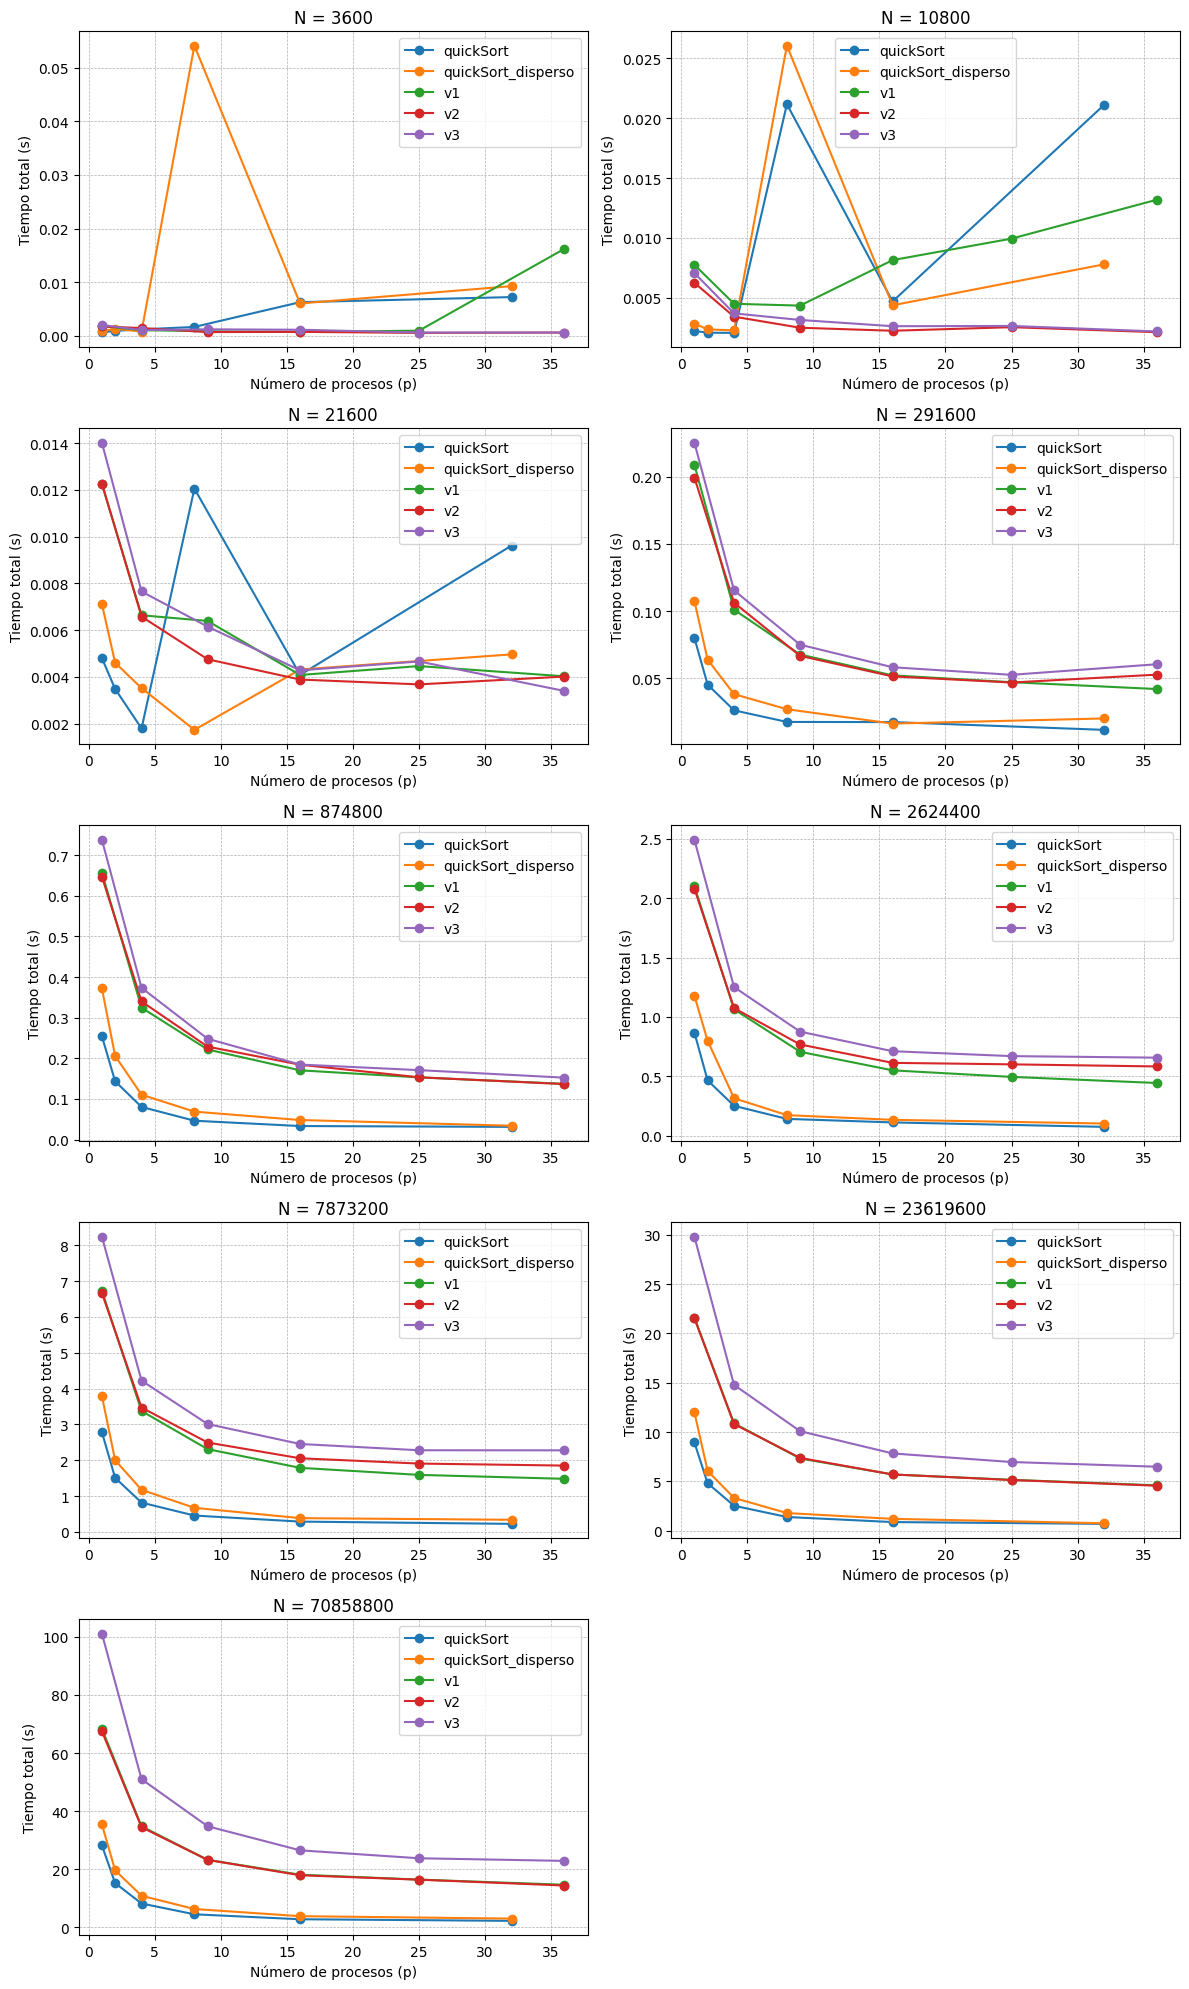

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TIEMPOS_DIR = "./tiempos"
OUT_DIR = "./graficos"

rows = []

list_compare = sorted(os.listdir(TIEMPOS_DIR))
list_compare = [e for e in list_compare if e != 'quickSec']

for version in  list_compare:
    vpath = os.path.join(TIEMPOS_DIR, version)

    for p in sorted(os.listdir(vpath), key=int):
        csv_path = os.path.join(vpath, p, 'tiempos.csv')
        df = pd.read_csv(csv_path)

        df['p'] = int(p)
        df['version'] = version
        rows.append(df)

df_all = pd.concat(rows, ignore_index=True)

df_filtered = df_all[(df_all['Step'] != 6) & (df_all['Step'] != 0)]
df_filtered['Total'] = df_filtered['Computo'] + df_filtered['Comunicacion']

df_grouped = df_filtered.groupby(['version', 'N', 'p'], as_index=False)[['Total']].sum()

Ns = sorted(df_grouped['N'].unique())
versions = sorted(df_grouped['version'].unique())

cmap = plt.get_cmap('tab10')
colors = {v: cmap(i % 10) for i, v in enumerate(versions)}

ncols = 2
nrows = (len(Ns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()

for i, N in enumerate(Ns):
    ax = axes[i]

    for v in versions:
        df_v = df_grouped[(df_grouped['version'] == v) & (df_grouped['N'] == N)].copy()
        df_v = df_v.sort_values('p')

        ax.plot(df_v['p'], df_v['Total'],
                marker='o',
                label=v,
                color=colors[v])

    ax.set_title(f"N = {N}")
    ax.set_xlabel("Número de procesos (p)")
    ax.set_ylabel("Tiempo total (s)")
    ax.grid(True, linestyle="--", linewidth=0.5)
    ax.legend()

for j in range(len(Ns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()

os.makedirs(OUT_DIR, exist_ok=True)
out_path = f"{OUT_DIR}/comparacion_versiones_tiempo.png"
fig.savefig(out_path, dpi=200)
print(out_path)


## Sort secuencial VS QuickSort VS Ranking sort

In [6]:
# Tiempo secuencial de referencia
TIEMPOS_DIR = "./tiempos/quickSec/tiempos.csv"
df_sec = pd.read_csv(TIEMPOS_DIR)

# Tiempo ranking sort
# Tiempo v2, ranking sort para chars distribution
TIEMPOS_DIR_RS_CHARS = "./tiempos/v2"
procesos_rs_chars = os.listdir(TIEMPOS_DIR_RS_CHARS)

# Tiempo v3, ranking sort para nums distribution
TIEMPOS_DIR_RS_NUMS = "./tiempos/v3"
procesos_rs_nums = os.listdir(TIEMPOS_DIR_RS_NUMS)

# Tiempos de quick sort en paralelo chars distribution
TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

# Tiempos de quick sort en paralelo nums distribution
TIEMPOS_DIR_QS_DISPERSO = "./tiempos/quickSort_disperso"
procesos_qs_nums = os.listdir(TIEMPOS_DIR_QS_DISPERSO)


all_data_v3 = []
for p in procesos_rs_nums:
    csv_path = os.path.join(TIEMPOS_DIR_RS_NUMS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_v3.append(df)

all_data_v2 = []
for p in procesos_rs_chars:
    csv_path = os.path.join(TIEMPOS_DIR_RS_CHARS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_v2.append(df)


all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

all_data_qs_disperso = []
for p in procesos_qs_nums:
    csv_path = os.path.join(TIEMPOS_DIR_QS_DISPERSO, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs_disperso.append(df)

# Ranking sort chars distribution
df_all_rs = pd.concat(all_data_v2, ignore_index=True)
df_all_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_all_rs = df_all_rs[(df_all_rs['p'] == 1) ].copy()
df_all_rs['Total'] = df_all_rs['Computo'] + df_all_rs['Comunicacion']
df_all_rs = df_all_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# Ranking sort nums distribution
df_all_rs_nums = pd.concat(all_data_v3, ignore_index=True)
df_all_rs_nums = df_all_rs_nums[(df_all_rs_nums['Step'] != 6) & (df_all_rs_nums['Step'] != 0)].copy()
df_all_rs_nums = df_all_rs_nums[(df_all_rs_nums['p'] == 1) ].copy()
df_all_rs_nums['Total'] = df_all_rs_nums['Computo'] + df_all_rs_nums['Comunicacion']
df_all_rs_nums = df_all_rs_nums.groupby(['N','p'], as_index=False)[['Total']].sum()



df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_all_qs = df_all_qs[ (df_all_qs['Step'] != 0)].copy()
df_all_qs = df_all_qs[(df_all_qs['p'] == 1) ].copy()


df_all_qs_disperso = pd.concat(all_data_qs_disperso, ignore_index=True)
df_all_qs_disperso = df_all_qs_disperso[ (df_all_qs_disperso['Step'] != 0)].copy()
df_all_qs_disperso = df_all_qs_disperso[(df_all_qs_disperso['p'] == 1) ].copy()


print("Tiempos secuenciales")
display(df_sec)

print("Tiempos ranking sort en chars")
display(df_all_rs)
print("Tiempos ranking sort en números")
display(df_all_rs_nums)

print("Tiempos  quicksor en chars")
display(df_all_qs)
print("Tiempos  quicksor en numeros")
display(df_all_qs_disperso)



Tiempos secuenciales


,Tiempo,N
0,0.002732,10800
1,0.005826,21600
2,9.827873,23619600
3,0.961363,2624400
4,0.089985,291600
5,0.000793,3600
6,31.247787,70858800
7,3.051929,7873200
8,0.293207,874800


Tiempos ranking sort en chars


,N,p,Total
0,3600,1,0.001745
1,10800,1,0.006260
2,21600,1,0.012272
3,291600,1,0.199408
4,874800,1,0.646944
5,2624400,1,2.080701
6,7873200,1,6.670063
7,23619600,1,21.545217
8,70858800,1,67.492679


Tiempos ranking sort en números


,N,p,Total
0,3600,1,0.002021
1,10800,1,0.007071
2,21600,1,0.014021
3,291600,1,0.225327
4,874800,1,0.737757
5,2624400,1,2.492845
6,7873200,1,8.242872
7,23619600,1,29.799616
8,70858800,1,101.061999


Tiempos  quicksor en chars


,Step,Computo,Comunicacion,N,p
91,1,0.002239,0.0,10800,1
93,1,0.004803,0.0,21600,1
95,1,8.955475,0.0,23619600,1
97,1,0.867524,0.0,2624400,1
99,1,0.080123,0.0,291600,1
101,1,0.000678,0.0,3600,1
103,1,28.241978,0.0,70858800,1
105,1,2.785291,0.0,7873200,1
107,1,0.254358,0.0,874800,1


Tiempos  quicksor en numeros


,Step,Computo,Comunicacion,N,p
91,1,0.002853,0.0,10800,1
93,1,0.007115,0.0,21600,1
95,1,12.007085,0.0,23619600,1
97,1,1.177464,0.0,2624400,1
99,1,0.107628,0.0,291600,1
101,1,0.000876,0.0,3600,1
103,1,35.461380,0.0,70858800,1
105,1,3.794797,0.0,7873200,1
107,1,0.372215,0.0,874800,1


In [7]:
tsec_dict = df_sec.set_index("N")["Tiempo"].to_dict()


print(tsec_dict)


{10800: 0.00273186, 21600: 0.00582594, 23619600: 9.8278731, 2624400: 0.96136293, 291600: 0.08998528, 3600: 0.00079289, 70858800: 31.24778697, 7873200: 3.0519287, 874800: 0.29320659}


## Tiempo, Speed up, Eficiencia si logaritmocs: Usando n*lg(n) como tiempo secuencial

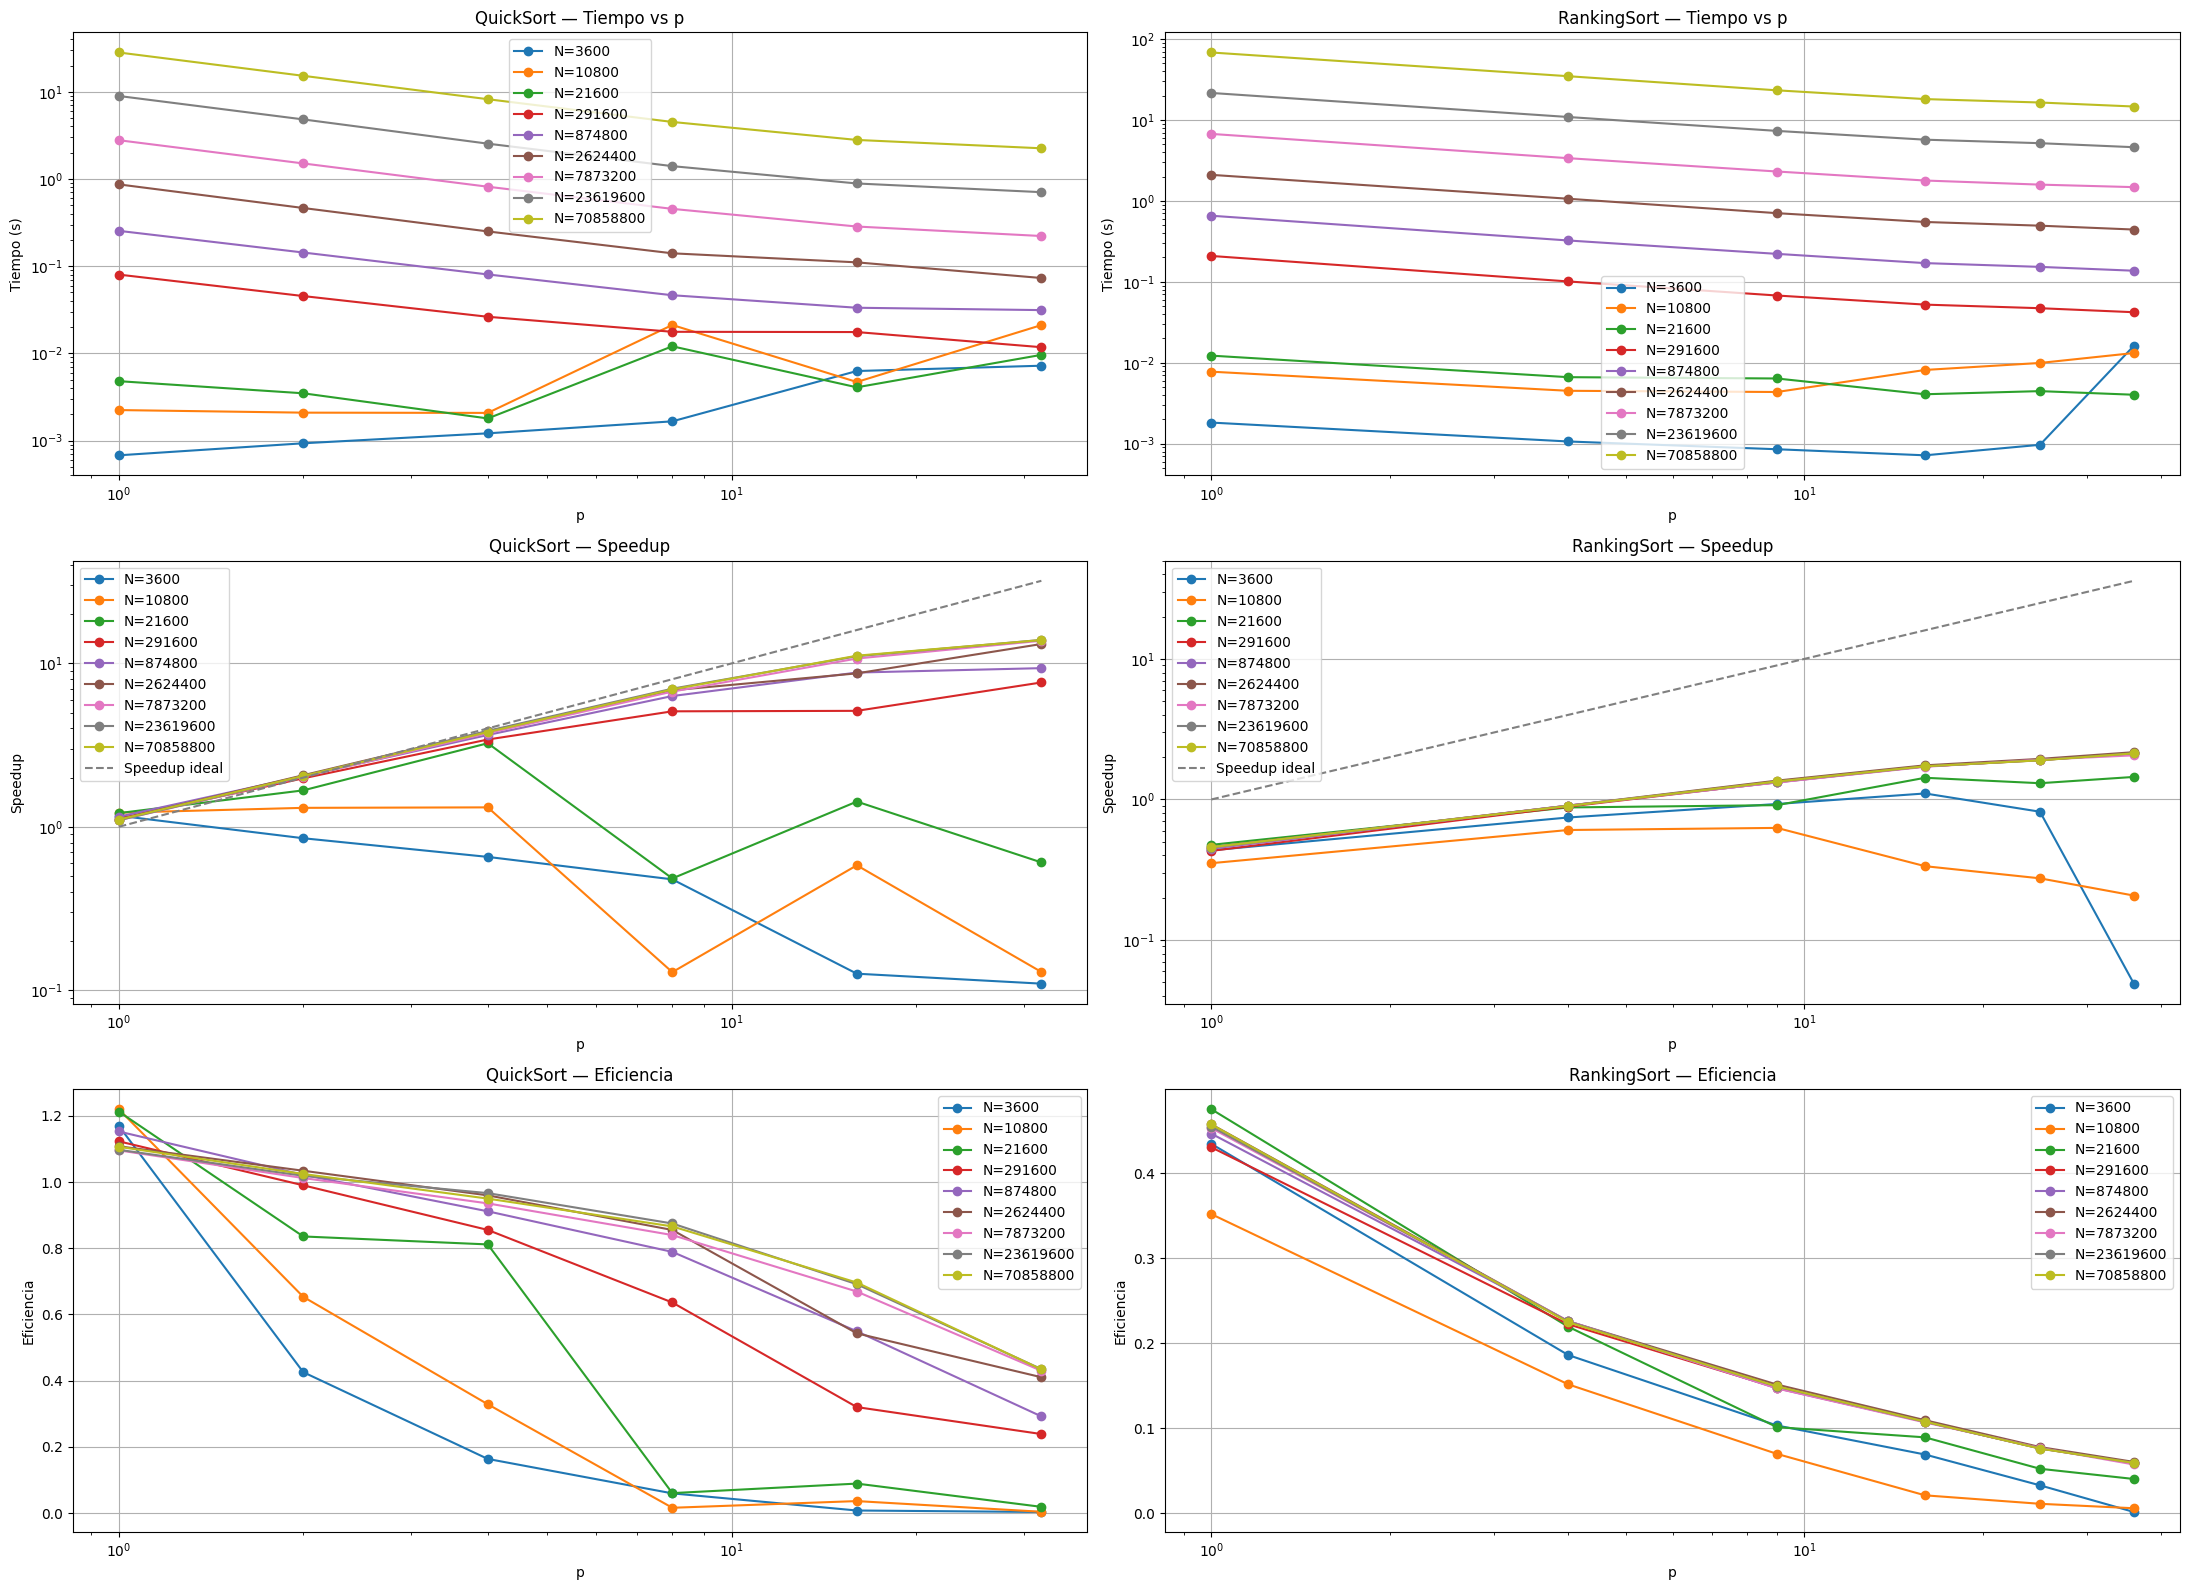

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------
#   QUICK SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']
df_grouped_qs = df_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   RANKING SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_RS = "./tiempos/v1"
procesos_rs = os.listdir(TIEMPOS_DIR_RS)

all_data_rs = []
for p in procesos_rs:
    csv_path = os.path.join(TIEMPOS_DIR_RS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_rs.append(df)

df_all_rs = pd.concat(all_data_rs, ignore_index=True)
df_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_rs['Total'] = df_rs['Computo'] + df_rs['Comunicacion']
df_grouped_rs = df_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   SPEEDUP DATA (QS y RS)
# ---------------------------------------------------

# QuickSort speedup
df_speed_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_speed_qs['Total'] = df_speed_qs['Computo'] + df_speed_qs['Comunicacion']
df_speed_qs = df_speed_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# RankingSort speedup
df_speed_rs = df_all_rs[df_all_rs['Step'].isin([1,2,3,4,5])].copy()
df_speed_rs['Total'] = df_speed_rs['Computo'] + df_speed_rs['Comunicacion']
df_speed_rs = df_speed_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   COLORS
# ---------------------------------------------------

unique_N = sorted(set(df_grouped_qs['N']) | set(df_grouped_rs['N']))
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

# ---------------------------------------------------
#   FIGURA 3×2 (6 gráficas)
# ---------------------------------------------------

fig, axes = plt.subplots(3, 2, figsize=(22, 16))

# ========================================
#   (1,1) — QuickSort TIME
# ========================================
ax = axes[0, 0]

for N, df_N in df_grouped_qs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (1,2) — RankingSort TIME
# ========================================
ax = axes[0, 1]

for N, df_N in df_grouped_rs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (2,1) — QuickSort SPEEDUP
# ========================================
ax = axes[1, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_qs["p"].min()),
    np.log10(df_speed_qs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("QuickSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (2,2) — RankingSort SPEEDUP
# ========================================
ax = axes[1, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
p_vals = np.logspace(
    np.log10(df_speed_rs["p"].min()),
    np.log10(df_speed_rs["p"].max()),
    100
)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("RankingSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (3,1) — QuickSort EFICIENCIA
# ========================================
ax = axes[2, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]

    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("QuickSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

# ========================================
#   (3,2) — RankingSort EFICIENCIA
# ========================================
ax = axes[2, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]


    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

ax.set_xscale("log")
ax.set_title("RankingSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


## Tiempo, Speed up, Eficiencia No logaritmicos

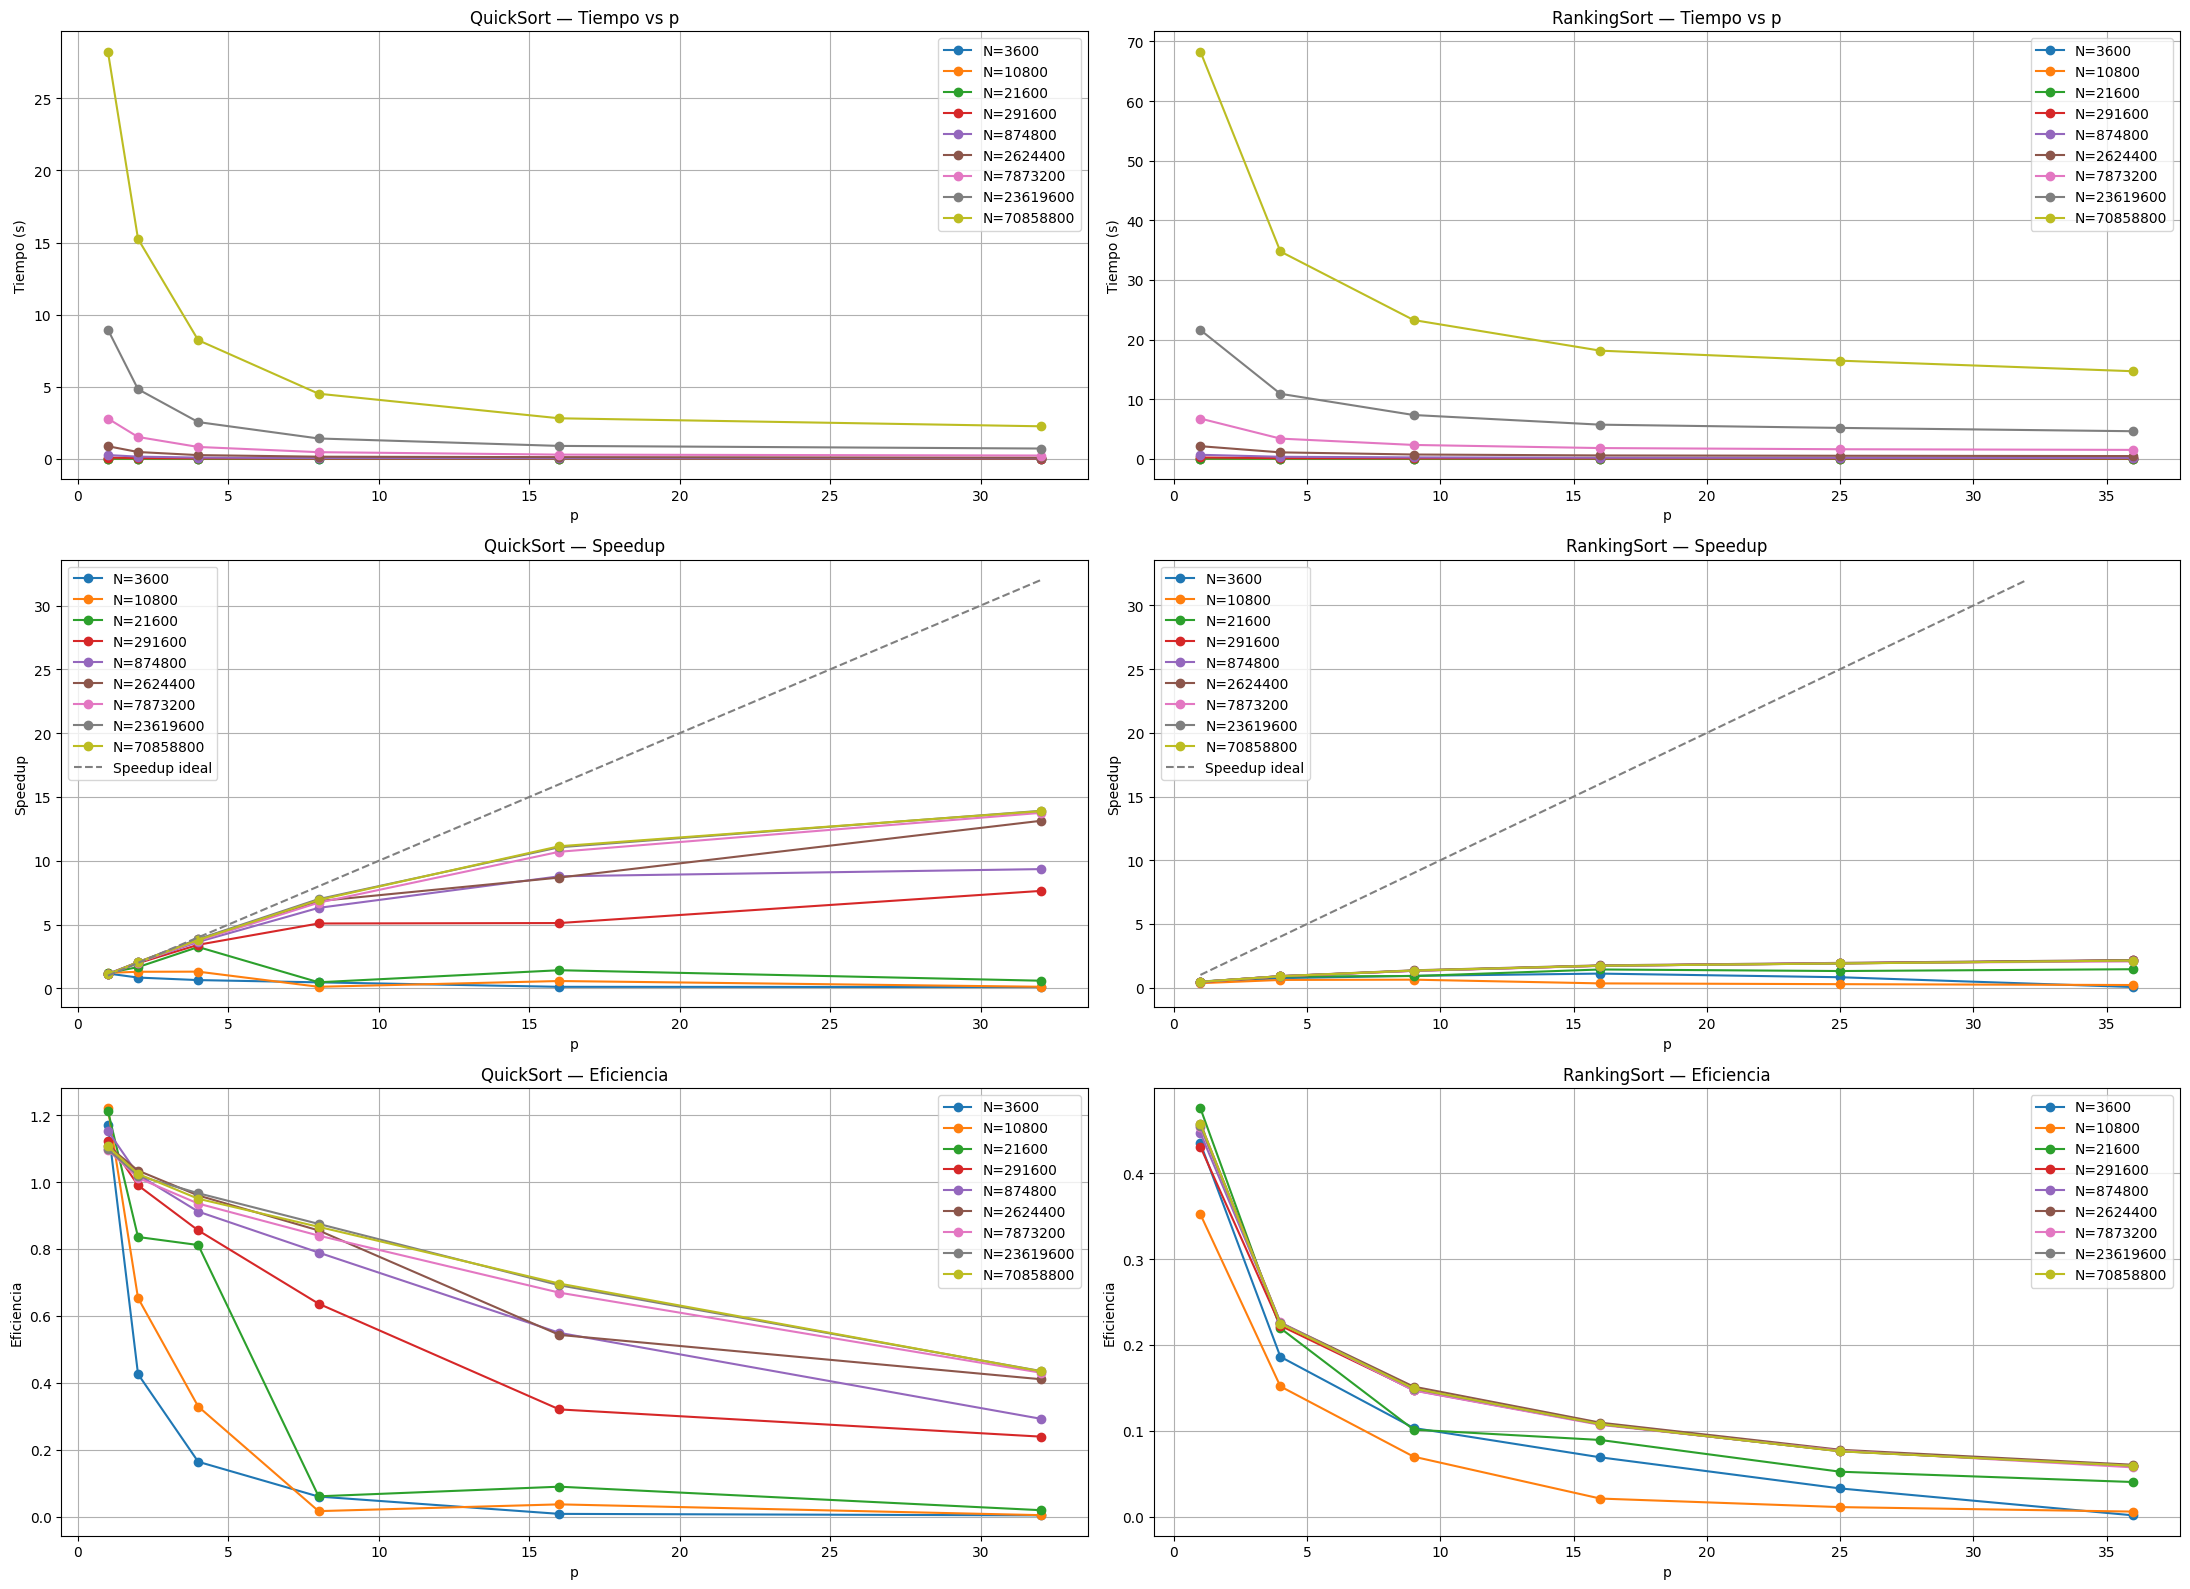

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------
#   QUICK SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_qs['Total'] = df_qs['Computo'] + df_qs['Comunicacion']
df_grouped_qs = df_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   RANKING SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_RS = "./tiempos/v1"
procesos_rs = os.listdir(TIEMPOS_DIR_RS)

all_data_rs = []
for p in procesos_rs:
    csv_path = os.path.join(TIEMPOS_DIR_RS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_rs.append(df)

df_all_rs = pd.concat(all_data_rs, ignore_index=True)
df_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_rs['Total'] = df_rs['Computo'] + df_rs['Comunicacion']
df_grouped_rs = df_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   SPEEDUP DATA (QS y RS)
# ---------------------------------------------------

# QuickSort speedup
df_speed_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
df_speed_qs['Total'] = df_speed_qs['Computo'] + df_speed_qs['Comunicacion']
df_speed_qs = df_speed_qs.groupby(['N','p'], as_index=False)[['Total']].sum()

# RankingSort speedup
df_speed_rs = df_all_rs[df_all_rs['Step'].isin([1,2,3,4,5])].copy()
df_speed_rs['Total'] = df_speed_rs['Computo'] + df_speed_rs['Comunicacion']
df_speed_rs = df_speed_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

# ---------------------------------------------------
#   COLORS
# ---------------------------------------------------

unique_N = sorted(set(df_grouped_qs['N']) | set(df_grouped_rs['N']))
cmap = plt.get_cmap('tab10')
colors = {N: cmap(i % 10) for i, N in enumerate(unique_N)}

# ---------------------------------------------------
#   FIGURA 3×2 (6 gráficas)
# ---------------------------------------------------

fig, axes = plt.subplots(3, 2, figsize=(22, 16))

# ========================================
#   (1,1) — QuickSort TIME
# ========================================
ax = axes[0, 0]

for N, df_N in df_grouped_qs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title("QuickSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (1,2) — RankingSort TIME
# ========================================
ax = axes[0, 1]

for N, df_N in df_grouped_rs.groupby('N'):
    ax.plot(df_N['p'], df_N['Total'],
            marker='o', color=colors[N], label=f"N={N}")

# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title("RankingSort — Tiempo vs p")
ax.set_xlabel("p")
ax.set_ylabel("Tiempo (s)")
ax.grid(True)
ax.legend()

# ========================================
#   (2,1) — QuickSort SPEEDUP
# ========================================
ax = axes[1, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
# p_vals = np.logspace(
#     np.log10(df_speed_qs["p"].min()),
#     np.log10(df_speed_qs["p"].max()),
#     100
# )
p_vals = np.linspace(df_speed_qs["p"].min(), df_speed_qs["p"].max(), 100)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title("QuickSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (2,2) — RankingSort SPEEDUP
# ========================================
ax = axes[1, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    ax.plot(df_N["p"], df_N["Speedup"],
            marker="o", color=colors[N], label=f"N={N}")

# curva ideal
# p_vals = np.logspace(
#     np.log10(df_speed_rs["p"].min()),
#     np.log10(df_speed_rs["p"].max()),
#     100
# )
p_vals = np.linspace(df_speed_qs["p"].min(), df_speed_qs["p"].max(), 100)
ax.plot(p_vals, p_vals, "--", color="gray", label="Speedup ideal")

# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_title("RankingSort — Speedup")
ax.set_xlabel("p")
ax.set_ylabel("Speedup")
ax.grid(True)
ax.legend()

# ========================================
#   (3,1) — QuickSort EFICIENCIA
# ========================================
ax = axes[2, 0]

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]

    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]

    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

# ax.set_xscale("log")
ax.set_title("QuickSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

# ========================================
#   (3,2) — RankingSort EFICIENCIA
# ========================================
ax = axes[2, 1]

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    # t1 = df_N.loc[df_N["p"] == 1, "Total"].values[0]
    # df_N = df_N.copy()
    # df_N["Speedup"] = t1 / df_N["Total"]
    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]


    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    ax.plot(df_N["p"], df_N["Eficiencia"],
            marker="o", color=colors[N], label=f"N={N}")

# ax.set_xscale("log")
ax.set_title("RankingSort — Eficiencia")
ax.set_xlabel("p")
ax.set_ylabel("Eficiencia")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


## Análisis de escalabilidad numérico

In [65]:
# ======================================================
#   DATAFRAME COMPLETO — QUICK SORT
# ======================================================
rows_qs = []

for N, df_N in df_speed_qs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    for _, row in df_N.iterrows():
        rows_qs.append({
            "N": N,
            "p": row["p"],
            "Total": row["Total"],
            "Speedup": row["Speedup"],
            "Eficiencia": row["Eficiencia"]
        })

df_eff_qs = pd.DataFrame(rows_qs)
display(df_eff_qs.head())

# ======================================================
#   DATAFRAME COMPLETO — RANKING SORT
# ======================================================
rows_rs = []

for N, df_N in df_speed_rs.groupby("N"):
    if 1 not in df_N["p"].values:
        continue

    Tsec = tsec_dict[N]
    df_N = df_N.copy()
    df_N["Speedup"] = Tsec / df_N["Total"]
    df_N["Eficiencia"] = df_N["Speedup"] / df_N["p"]

    for _, row in df_N.iterrows():
        rows_rs.append({
            "N": N,
            "p": row["p"],
            "Total": row["Total"],
            "Speedup": row["Speedup"],
            "Eficiencia": row["Eficiencia"]
        })

df_eff_rs = pd.DataFrame(rows_rs)
display(df_eff_rs.head())



,N,p,Total,Speedup,Eficiencia
0,3600,1.0,0.000678,1.169903,1.169903
1,3600,2.0,0.000931,0.851517,0.425758
2,3600,4.0,0.001211,0.654686,0.163671
3,3600,8.0,0.001662,0.477150,0.059644
4,3600,16.0,0.006277,0.126317,0.007895


,N,p,Total,Speedup,Eficiencia
0,3600,1.0,0.001824,0.434780,0.434780
1,3600,4.0,0.001065,0.744561,0.186140
2,3600,9.0,0.000854,0.928769,0.103197
3,3600,16.0,0.000718,1.103858,0.068991
4,3600,25.0,0.000969,0.818349,0.032734


In [12]:
display(df_eff_qs['N'].unique())
display(df_eff_qs['p'].unique())

display(df_eff_rs['p'].unique())

array([    3600,    10800,    21600,   291600,   874800,  2624400,
        7873200, 23619600, 70858800])

array([ 1.,  2.,  4.,  8., 16., 32.])

array([ 1.,  4.,  9., 16., 25., 36.])

## Escalabilidad Numérica con teórica

In [ ]:
# quicksort Condición de escalabilidad: plg^2p proporcional a n*lgn
# ranking sort Condición de escalabilidad: 2^(sqrt(p)) proporcional a n

# =========================
#   QUICK SORT
# =========================

p1 = 16
N1 = 7873200

p2 = 32
N2 = 70858800

# p1 = 25
# N1 = 291600

# p2 = 36
# N2 = 70858800

qs1 = df_eff_qs[(df_eff_qs['p'] == p1) & (df_eff_qs['N'] == N1)]
qs2 = df_eff_qs[(df_eff_qs['p'] == p2) & (df_eff_qs['N'] == N2)]

# ----- LHS = p * (log p)^2 -----
# lhs_qs1 = p1 * (np.log2(p1)**2)
# lhs_qs2 = p2 * (np.log2(p2)**2)
lhs_qs1 = np.log2(p1)
lhs_qs2 = np.log2(p2)

# ----- RHS = n * log n -----
rhs_qs1 = np.log2(N1)
rhs_qs2 = np.log2(N2)

print("\n===== QUICK SORT SCALABILITY =====")
print("LHS ratio =", lhs_qs1 / lhs_qs2)
print("RHS ratio =", rhs_qs1 / rhs_qs2)


# =========================
#   RANKING SORT
# =========================
# A
print("A")
p1 = 25
N1 = 291600

p2 = 36
N2 = 70858800

rs1 = df_eff_rs[(df_eff_rs['p'] == p1) & (df_eff_rs['N'] == N1)]
rs2 = df_eff_rs[(df_eff_rs['p'] == p2) & (df_eff_rs['N'] == N2)]

# ----- LHS = p^(sqrt(p)) -----
lhs_rs1 = p1 ** (np.sqrt(p1))
lhs_rs2 = p2** (np.sqrt(p2))

# ----- RHS = n -----
rhs_rs1 = N1
rhs_rs2 = N2

print("\n===== RANKING SORT SCALABILITY =====")
print("LHS ratio =", lhs_rs1 / lhs_rs2)
print("RHS ratio =", rhs_rs1 / rhs_rs2)





===== QUICK SORT SCALABILITY =====
LHS ratio = 0.8
RHS ratio = 0.8784465423555555

===== RANKING SORT SCALABILITY =====
LHS ratio = 0.0044862661913846035
RHS ratio = 0.00411522633744856


In [70]:
import pandas as pd

def encontrar_intersecciones(df, E_target):
    results = []

    for N, df_N in df.groupby("N"):
        df_N = df_N.sort_values("p")
        p_vals = df_N["p"].values
        E_vals = df_N["Eficiencia"].values

        for i in range(len(p_vals)-1):
            E1, E2 = E_vals[i], E_vals[i+1]
            # Chequea si E_target está entre E1 y E2
            if (E1 - E_target) * (E2 - E_target) <= 0:
                # Interpolación lineal
                if E2 != E1:
                    p_cross = p_vals[i] + (p_vals[i+1] - p_vals[i]) * (E_target - E1) / (E2 - E1)
                else:
                    p_cross = p_vals[i]  # caso exacto
                results.append({"N": N, "p": p_cross, "Eficiencia": E_target})

    return pd.DataFrame(results)

# Ejemplo de uso:
E_qs_obj = 0.6
E_rs_obj = 0.4
intersections_qs = encontrar_intersecciones(df_eff_qs, E_qs_obj)
intersections_rs = encontrar_intersecciones(df_eff_rs, E_rs_obj)

print("Intersecciones QuickSort:")
print(intersections_qs)
print("\nIntersecciones RankingSort:")
print(intersections_rs)


Intersecciones QuickSort:
          N          p  Eficiencia
0      3600   1.765850         0.6
1     10800   2.328311         0.6
2     21600   5.126726         0.6
3    291600   8.916167         0.6
4    874800  14.303964         0.6
5   2624400  14.539495         0.6
6   7873200  20.630266         0.6
7  23619600  21.701407         0.6
8  70858800  21.878809         0.6

Intersecciones RankingSort:
          N         p  Eficiencia
0      3600  1.419638         0.4
1     21600  1.885323         0.4
2    291600  1.442616         0.4
3    874800  1.635282         0.4
4   2624400  1.747219         0.4
5   7873200  1.704479         0.4
6  23619600  1.720760         0.4
7  70858800  1.741802         0.4


In [82]:
import numpy as np

def check_escalabilidad_rs(df_intersections, verbose=True):
    """
    Chequea la escalabilidad usando la relación p^(√p) ~ N
    df_intersections: DataFrame con columnas N y p
    """
    df_sorted = df_intersections.sort_values("N").reset_index(drop=True)
    results = []

    for i in range(len(df_sorted)-1):
        N1, p1 = df_sorted.loc[i, ["N","p"]]
        N2, p2 = df_sorted.loc[i+1, ["N","p"]]

        # lhs_ratio = (p1**np.sqrt(p1)) / (p2**np.sqrt(p2))
        lhs_ratio = (p1**(1/2)) / (p2**(1/2))
        lhs_ratio_2 = (p1**np.sqrt(p1)) / (p2**np.sqrt(p2))

        rhs_ratio = N1 / N2
        rel_error = abs(lhs_ratio - rhs_ratio) / rhs_ratio

        results.append({
            "N1": N1, "p1": p1,
            "N2": N2, "p2": p2,
            "LHS_ratio": lhs_ratio,
            "RHS_ratio": rhs_ratio,
            "Abs error II": abs(lhs_ratio - rhs_ratio),
            "Abs error III": abs(lhs_ratio_2 - rhs_ratio),
            # "Relative_error": rel_error
        })
        if verbose:
            print(f"\nCheck N1={N1}, N2={N2}")
            print(f"LHS ratio (p^√p) = {lhs_ratio:.4f}")
            print(f"RHS ratio (N)     = {rhs_ratio:.4f}")
            # print(f"Relative error    = {rel_error:.4f}")
            print(f"Abs error    = {abs(lhs_ratio - rhs_ratio):.4f}")

    return pd.DataFrame(results)
# print("===== QuickSort Scalability =====")
# scal_qs = check_escalabilidad(intersections_qs)
import pandas as pd
import numpy as np

print("\n===== RankingSort Scalability =====")
scal_rs = check_escalabilidad_rs(intersections_rs, False)
display(scal_rs)



===== RankingSort Scalability =====


,N1,p1,N2,p2,LHS_ratio,RHS_ratio,Abs error II,Abs error III
0,3600.0,1.419638,21600.0,1.885323,0.867752,0.166667,0.701086,0.468947
1,21600.0,1.885323,291600.0,1.442616,1.143188,0.074074,1.069114,1.463975
2,291600.0,1.442616,874800.0,1.635282,0.939245,0.333333,0.605912,0.494639
3,874800.0,1.635282,2624400.0,1.747219,0.967437,0.333333,0.634104,0.563678
4,2624400.0,1.747219,7873200.0,1.704479,1.012460,0.333333,0.679127,0.708947
5,7873200.0,1.704479,23619600.0,1.720760,0.995258,0.333333,0.661925,0.651003
6,23619600.0,1.720760,70858800.0,1.741802,0.993941,0.333333,0.660608,0.646492


In [86]:
def check_escalabilidad_qs(df_intersections, verbose=True):
    df_sorted = df_intersections.sort_values("N").reset_index(drop=True)
    results = []

    for i in range(len(df_sorted)-1):
        N1, p1 = df_sorted.loc[i, ["N","p"]]
        N2, p2 = df_sorted.loc[i+1, ["N","p"]]

        # lhs_ratio = (p1**np.sqrt(p1)) / (p2**np.sqrt(p2))
        lhs_ratio = p1**(1/p1) / p2**(1/p2)
        # lhs_ratio_2 = (p1**np.sqrt(p1)) / (p2**np.sqrt(p2))

        rhs_ratio = 1/1
        rel_error = abs(lhs_ratio - rhs_ratio) / rhs_ratio

        results.append({
            "N1": N1, "p1": p1,
            "N2": N2, "p2": p2,
            "LHS_ratio": lhs_ratio,
            "RHS_ratio": rhs_ratio,
            "Abs error III": abs(lhs_ratio - rhs_ratio),
            # "Abs error III": abs(lhs_ratio_2 - rhs_ratio),
            # "Relative_error": rel_error
        })
        if verbose:
            print(f"\nCheck N1={N1}, N2={N2}")
            print(f"LHS ratio (p^√p) = {lhs_ratio:.4f}")
            print(f"RHS ratio (N)     = {rhs_ratio:.4f}")
            # print(f"Relative error    = {rel_error:.4f}")
            print(f"Abs error    = {abs(lhs_ratio - rhs_ratio):.4f}")

    return pd.DataFrame(results)
print("===== QuickSort Scalability =====")
scal_qs = check_escalabilidad_qs(intersections_qs, False)

display(scal_qs)

===== QuickSort Scalability =====


,N1,p1,N2,p2,LHS_ratio,RHS_ratio,Abs error III
0,3600.0,1.765850,10800.0,2.328311,0.959859,1.0,0.040141
1,10800.0,2.328311,21600.0,5.126726,1.045163,1.0,0.045163
2,21600.0,5.126726,291600.0,8.916167,1.076194,1.0,0.076194
3,291600.0,8.916167,874800.0,14.303964,1.061180,1.0,0.061180
4,874800.0,14.303964,2624400.0,14.539495,1.001892,1.0,0.001892
5,2624400.0,14.539495,7873200.0,20.630266,1.038104,1.0,0.038104
6,7873200.0,20.630266,23619600.0,21.701407,1.004921,1.0,0.004921
7,23619600.0,21.701407,70858800.0,21.878809,1.000778,1.0,0.000778


## Quick Sort Vs Rankig sort time execution (Tcomm and Tcomp)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# ---------------------------------------------------
#   QUICK SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_QS = "./tiempos/quickSort"
procesos_qs = os.listdir(TIEMPOS_DIR_QS)

all_data_qs = []
for p in procesos_qs:
    csv_path = os.path.join(TIEMPOS_DIR_QS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_qs.append(df)

df_all_qs = pd.concat(all_data_qs, ignore_index=True)
df_qs = df_all_qs[df_all_qs['Step'] != 1].copy()
display(df_qs)

# ---------------------------------------------------
#   RANKING SORT DATA
# ---------------------------------------------------

TIEMPOS_DIR_RS = "./tiempos/v1"
procesos_rs = os.listdir(TIEMPOS_DIR_RS)

all_data_rs = []
for p in procesos_rs:
    csv_path = os.path.join(TIEMPOS_DIR_RS, p, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data_rs.append(df)

df_all_rs = pd.concat(all_data_rs, ignore_index=True)
df_rs = df_all_rs[(df_all_rs['Step'] != 6) & (df_all_rs['Step'] != 0)].copy()
df_rs = df_rs.groupby(['N', 'p'],  as_index=False).sum()
# df_grouped_rs = df_rs.groupby(['N','p'], as_index=False)[['Total']].sum()

display(df_rs)



,Step,Computo,Comunicacion,N,p
0,0,0.000306,0.004391,10800,16
2,0,0.000597,0.003486,21600,16
4,0,0.734078,0.154346,23619600,16
6,0,0.067324,0.043333,2624400,16
8,0,0.009601,0.007962,291600,16
10,0,0.000095,0.006182,3600,16
12,0,2.340463,0.464081,70858800,16
14,0,0.226191,0.058818,7873200,16
16,0,0.020414,0.012958,874800,16
18,0,0.001237,0.000854,10800,2


,N,p,Step,Computo,Comunicacion
0,3600,1,15,0.001822,0.000001
1,3600,4,15,0.000974,0.000091
2,3600,9,15,0.000769,0.000084
3,3600,16,15,0.000642,0.000076
4,3600,25,15,0.000852,0.000117
5,3600,36,15,0.016055,0.000158
6,10800,1,15,0.007749,0.000010
7,10800,4,15,0.004169,0.000335
8,10800,9,15,0.004106,0.000245
9,10800,16,15,0.007796,0.000354


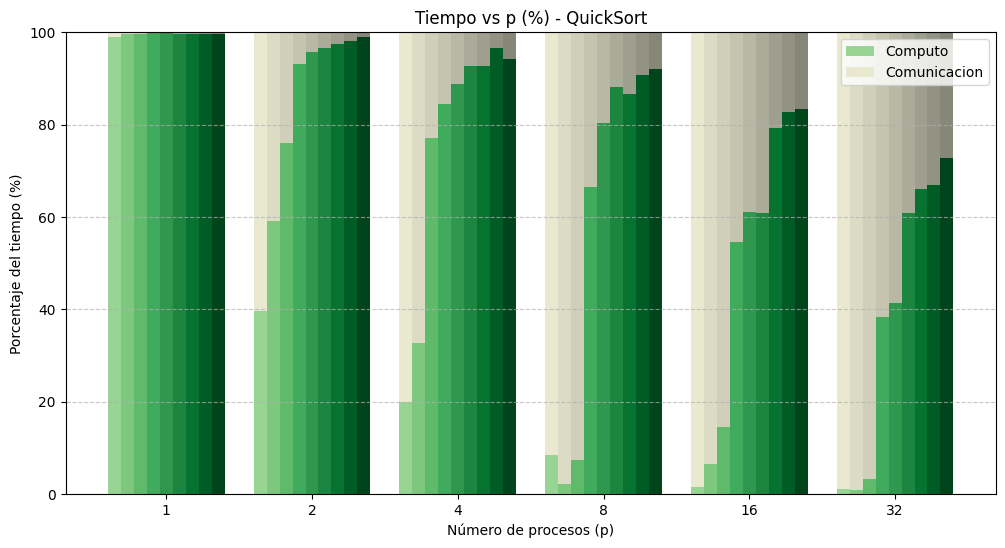

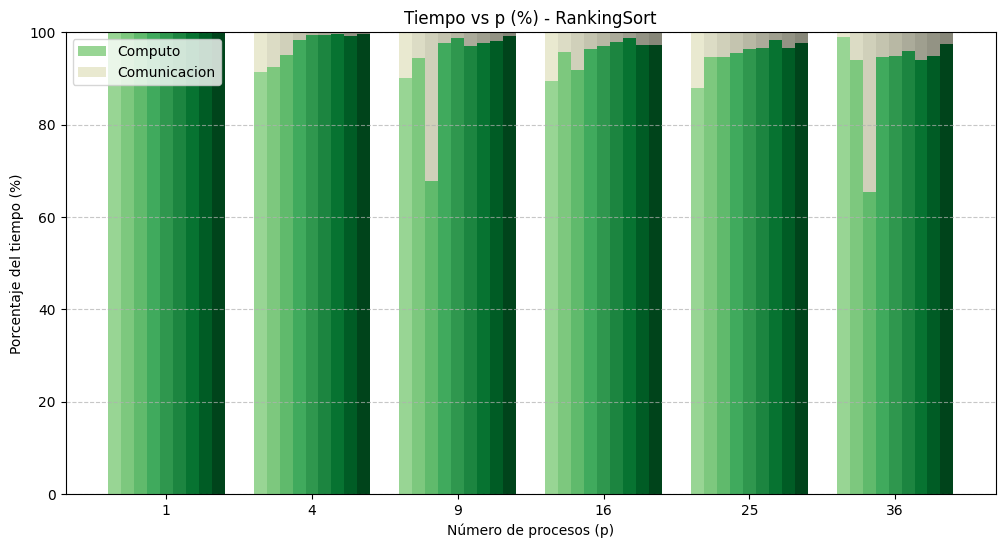

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tiempo_vs_p_porcentaje(df, title="Tiempo vs p (%)", algorithm_name="Algoritmo"):
    """
    Barras apiladas de Computo (verde) y Comunicacion (beige) como porcentaje,
    con gradiente de color por N y espaciado uniforme en X.
    """
    Ns = sorted(df['N'].unique())
    ps = sorted(df['p'].unique())
    
    # Mapear cada p a un índice consecutivo
    p_to_idx = {p: i for i, p in enumerate(ps)}
    
    # Ancho máximo total para un grupo de barras en cada p
    max_group_width = 0.8
    width = max_group_width / len(Ns)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Colormaps para Computo y Comunicacion
    cmap_computo = plt.cm.Greens
    base_color_comunicacion = np.array([0.96, 0.96, 0.86])  # beige RGB
    
    for i, N in enumerate(Ns):
        df_N = df[df['N'] == N].sort_values('p')
        total = df_N['Computo'] + df_N['Comunicacion']
        computo_pct = (df_N['Computo'] / total * 100).values
        comunicacion_pct = (df_N['Comunicacion'] / total * 100).values
        
        # Intensidad del color según el índice de N (más grande -> más oscuro)
        color_computo = cmap_computo(0.4 + 0.6*i/(len(Ns)-1 if len(Ns)>1 else 1))
        # Beige ligeramente más oscuro según N
        factor = 0.6 + 0.4*i/(len(Ns)-1 if len(Ns)>1 else 1)
        color_comunicacion = base_color_comunicacion * (1.55 - factor)
        color_comunicacion = np.clip(color_comunicacion, 0, 1)  # asegurar que RGB esté en 0-1
        
        # Posiciones centradas
        x = np.array([p_to_idx[p] for p in df_N['p']]) - max_group_width/2 + i*width + width/2
        
        ax.bar(x, computo_pct, width=width, color=color_computo, label='Computo' if i==0 else "")
        ax.bar(x, comunicacion_pct, bottom=computo_pct, width=width, color=color_comunicacion, label='Comunicacion' if i==0 else "")
    
    ax.set_xticks(list(p_to_idx.values()))
    ax.set_xticklabels(list(p_to_idx.keys()))
    ax.set_xlabel("Número de procesos (p)")
    ax.set_ylabel("Porcentaje del tiempo (%)")
    ax.set_title(f"{title} - {algorithm_name}")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(0, 100)
    ax.legend()
    
    plt.show()

# QuickSort
plot_tiempo_vs_p_porcentaje(df_qs, title="Tiempo vs p (%)", algorithm_name="QuickSort")

# RankingSort
plot_tiempo_vs_p_porcentaje(df_rs, title="Tiempo vs p (%)", algorithm_name="RankingSort")
